<a href="https://colab.research.google.com/github/Flaviofrc97/DASCIENSE-MACHINE-LEARNING/blob/main/Analise_seguro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação das bibliotecas e base de dados

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
base_train = pd.read_csv('/content/train.csv')
base_test = pd.read_csv('/content/test.csv')

In [ ]:
base_train.shape, base_test.shape

((381109, 12), (127037, 11))

In [ ]:
base_test.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [ ]:
base_train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


# Visualização de dados

In [ ]:
base_train['Vehicle_Damage'] = base_train['Vehicle_Damage'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
base_train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0


In [ ]:
#Excluindo coluna id pois é um valor unico para cada pessoa
base_train.drop(['id'], axis=1, inplace=True)

In [ ]:
base_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0


In [ ]:
base_train.isnull().sum()

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

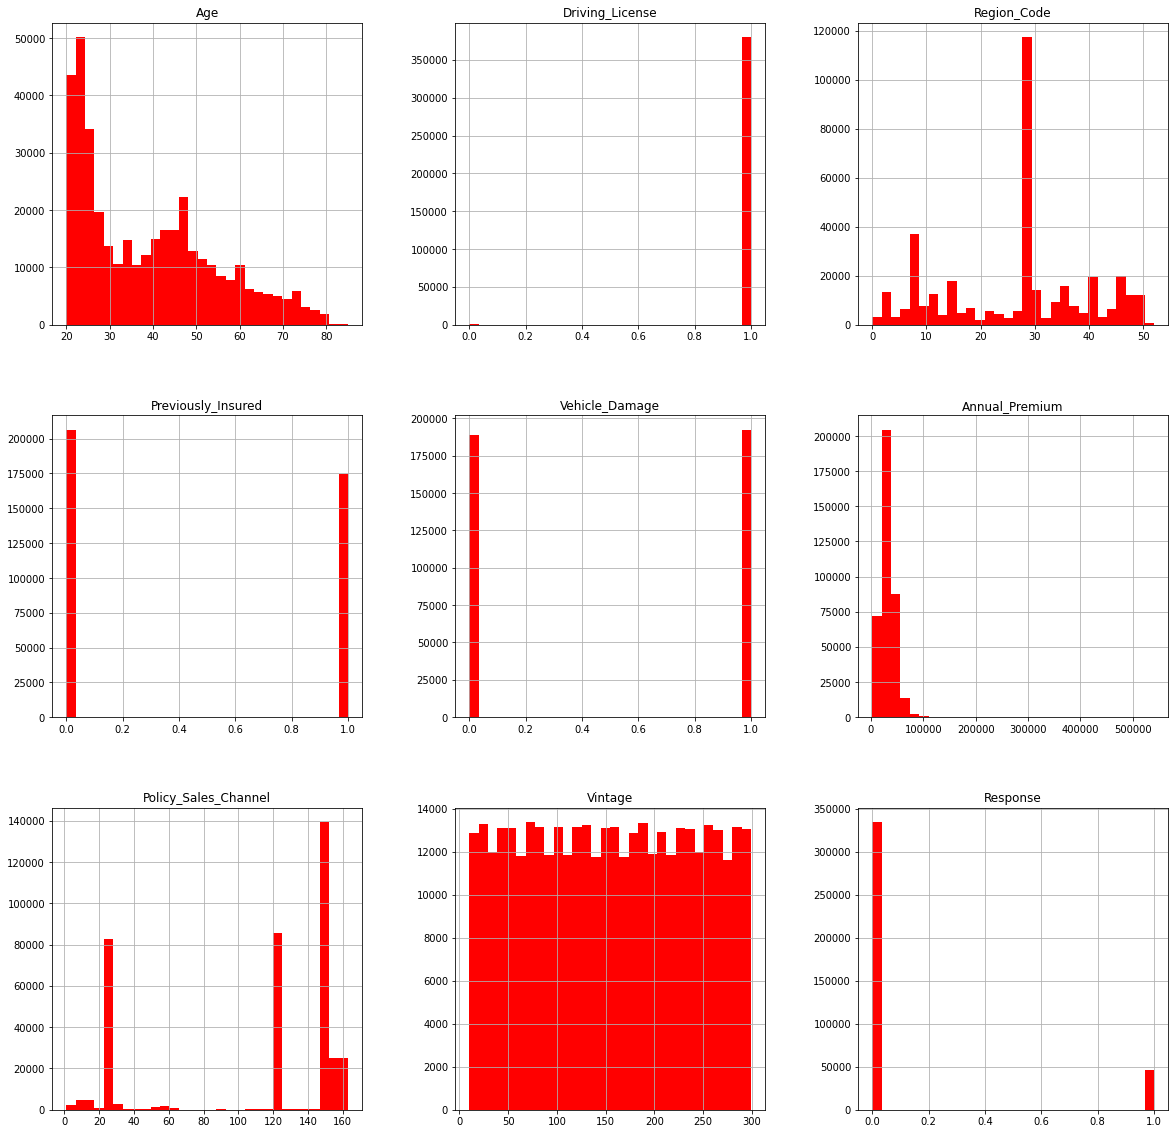

In [ ]:
base_train.hist(bins=30, figsize=(20,20), color='r');

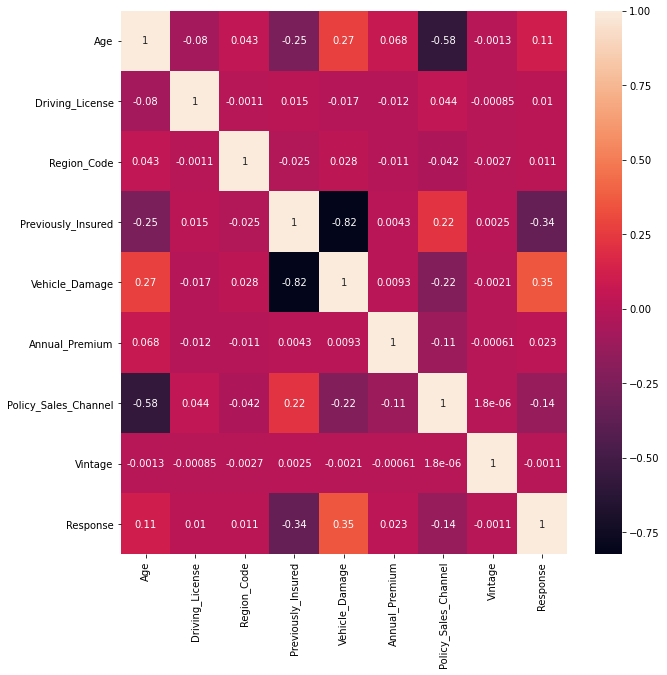

In [ ]:
correlation = base_train.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(correlation, annot=True);

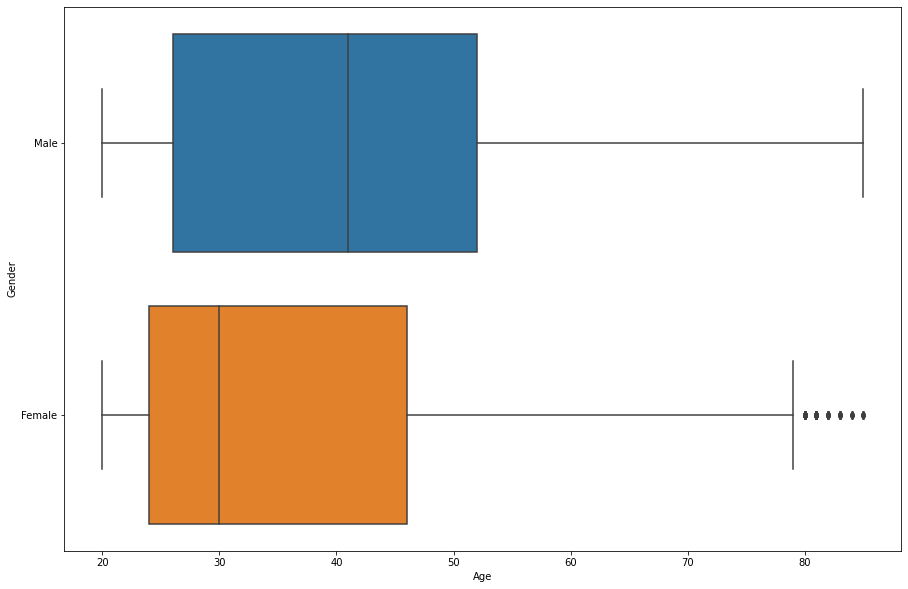

In [ ]:
plt.figure(figsize=[15,10])
sns.boxplot(x = 'Age', y='Gender', data =base_train);

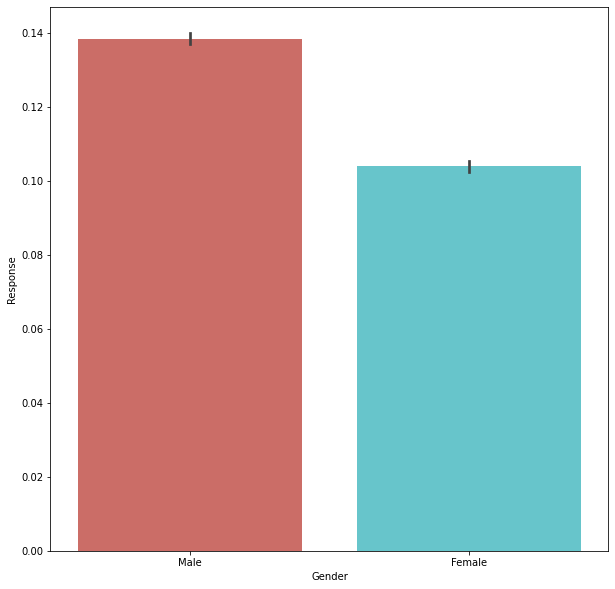

In [ ]:
plt.figure(figsize=[10,10])
sns.barplot(x="Gender", y="Response", data=base_train, palette="hls");

In [ ]:
#Dividindo dos DF, para os que têm interesse e para os que não tem
tem_interesse = base_train[base_train['Response'] == 1] 
nao_tem_interesse = base_train[base_train['Response'] == 0]
qtd_homens_interesse = tem_interesse[base_train['Gender'] == 'Male']
mulher_com_interesse = tem_interesse[tem_interesse['Gender'] == 'Female']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [ ]:
print('Total =', len(base_train))
print('total com interesse', len(tem_interesse))
print('total sem interesse', len(nao_tem_interesse))
print('porcentagem dos que tem interesse', len(tem_interesse) / len(base_train) * 100)
print('porcentagem dos que não tem interesse', len(nao_tem_interesse) / len(base_train) * 100)
print('Procentagem Homens com interesse', len(qtd_homens_interesse) / len(tem_interesse) * 100)
print('Porcentagem mulheres com interese', len(mulher_com_interesse)/ len(tem_interesse) * 100)

Total = 381109
total com interesse 46710
total sem interesse 334399
porcentagem dos que tem interesse 12.256336113815209
porcentagem dos que não tem interesse 87.74366388618479
Procentagem Homens com interesse 61.06829372725326
Porcentagem mulheres com interese 38.93170627274674


Levando em consideração a base de treinamente, é possível perceber que apenas **12%** (46.710) das pessoas declararam ter interesse em *adquiquir* o seguro para carro. Desses **12%**, **61%** é homem e **39%** é mulher.

In [ ]:
numero_ligações = 40000
print('alcance', numero_ligações / len(tem_interesse) * 100)

alcance 85.63476771569258


O time de vendas não conseguirá entrar em contato com todos que têm interessa, uma vez que a capacidade é de 20 mil ligações e número de pessoas que tem interesso é 46.710. 

Porém, caso a meta de ligações dobre (40 mil), é possível alçancar 85% das pessosas que tem interesse me adquirir o seguro.

In [ ]:
print('Quantas ligações o time de vendas precisa fazer para contatar 80% dos clientes interessados em adquirir um seguro de automóvel?', len(tem_interesse) * 0.8)

Quantas ligações o time de vendas precisa fazer para contatar 80% dos clientes interessados em adquirir um seguro de automóvel? 37368.0


# Pré-processamento 

In [ ]:
base_train.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,1,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,0,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,1,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,0,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,0,27496.0,152.0,39,0


In [ ]:
#separando numerica e categorica
base_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  int64  
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 32.0+ MB


In [ ]:
base_train_cat = base_train[['Gender', 'Vehicle_Age']]

In [ ]:
base_train_cat.head()

,Gender,Vehicle_Age
0,Male,> 2 Years
1,Male,1-2 Year
2,Male,> 2 Years
3,Male,< 1 Year
4,Female,< 1 Year


In [ ]:
#Criando variaveis dummys
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
base_train_cat = onehotencoder.fit_transform(base_train_cat).toarray()

In [ ]:
base_train_cat = pd.DataFrame(base_train_cat)
base_train_cat.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0


In [ ]:
type(base_train_cat)

pandas.core.frame.DataFrame

In [ ]:
#Separando variaveis numericas
base_train_numerical = base_train[['Age', 'Driving_License', 'Region_Code', 'Previously_Insured', 'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage']]

In [ ]:
base_train_numerical.head()

,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,44,1,28.0,0,1,40454.0,26.0,217
1,76,1,3.0,0,0,33536.0,26.0,183
2,47,1,28.0,0,1,38294.0,26.0,27
3,21,1,11.0,1,0,28619.0,152.0,203
4,29,1,41.0,1,0,27496.0,152.0,39


In [ ]:
#Concatenado categorica + numercia
base_train_all = pd.concat([base_train_cat, base_train_numerical], axis=1)

In [ ]:
base_train_all.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,44,1,28.0,0,1,40454.0,26.0,217
1,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,76,1,3.0,0,0,33536.0,26.0,183
2,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,47,1,28.0,0,1,38294.0,26.0,27
3,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,21,1,11.0,1,0,28619.0,152.0,203
4,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,29,1,41.0,1,0,27496.0,152.0,39


In [ ]:
#Colocando os valores na mesma escala.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(base_train_all)

In [ ]:
x

array([[0.        , 1.        , 1.        , ..., 0.07036565, 0.15432099,
        0.71626298],
       [0.        , 1.        , 1.        , ..., 0.05749579, 0.15432099,
        0.59861592],
       [0.        , 1.        , 1.        , ..., 0.06634731, 0.15432099,
        0.05882353],
       ...,
       [0.        , 1.        , 1.        , ..., 0.06043886, 0.98148148,
        0.52249135],
       [1.        , 0.        , 0.        , ..., 0.07811026, 0.75925926,
        0.22145329],
       [0.        , 1.        , 1.        , ..., 0.07282689, 0.15432099,
        0.78546713]])

In [ ]:
y = base_train['Response']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25)

# REGRESSÃO LINEAR

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic = LogisticRegression(solver='lbfgs')
logistic.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred_logistic = logistic.predict(x_test)

In [ ]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_logistic))

Accuracy: 0.875721572661055


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_logistic))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     83437
           1       0.50      0.00      0.00     11841

    accuracy                           0.88     95278
   macro avg       0.69      0.50      0.47     95278
weighted avg       0.83      0.88      0.82     95278



# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=200)

In [ ]:
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred_random = clf.predict(x_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_random))

Accuracy: 0.8649740758622138


In [ ]:
print(classification_report(y_test, y_pred_random))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     83437
           1       0.37      0.12      0.18     11841

    accuracy                           0.86     95278
   macro avg       0.63      0.55      0.55     95278
weighted avg       0.82      0.86      0.83     95278

